In [1]:
############################################################################
# OpenEnsemble Project													   #
# Testing the mixture model for the  dataset.                          #
############################################################################
import numpy as np 
import pandas as pd 
#import mixture_model
#import utilities
#import fitnessmetric
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe
import sklearn.cluster as skc


#comment this to suppress showing in notebooks
%matplotlib inline 

## Generate Half Rings points.
halfRings = []
while(True):
    x = np.random.normal(0,20)
    y = np.random.normal(0,20)
    z = np.random.normal(0,20)
    if ((x ** 2 + y ** 2) >= 0.5) and ((x ** 2 + y ** 2) <= 1):
        halfRings.append(list([x,y]))
    elif ((x ** 2 + y ** 2) >= 10) and ((x ** 2 + y ** 2) <= 11):
        halfRings.append(list([x,y]))
        
    if len(halfRings) == 400:
        break

halfRings = np.asarray(halfRings)
df = pd.DataFrame(halfRings)
dataObj = oe.data(df, [1,2])



In [2]:
dataObj.D['parent'].shape[0]

400

/Users/knaegle/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


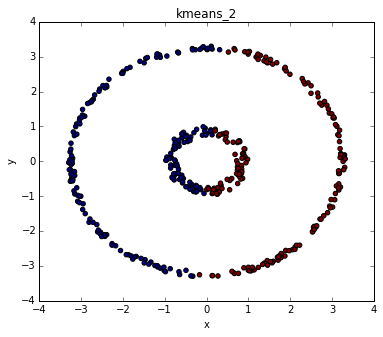

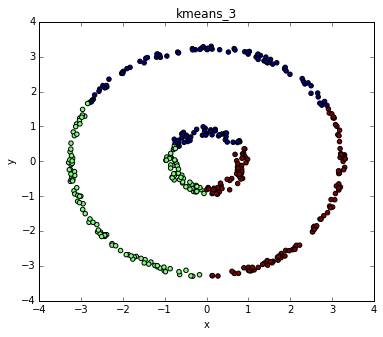

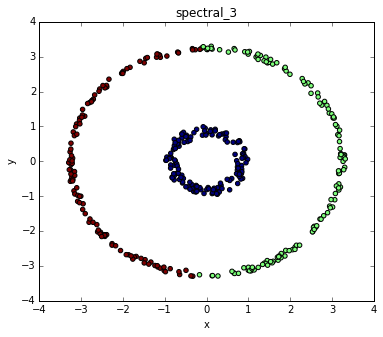

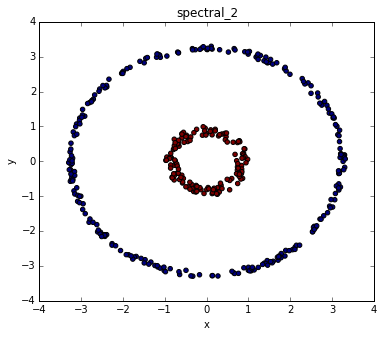

In [3]:
##################################################
# Part I: Base Solutions                         #
##################################################

# 'Hirarch_Clust_2': skc.AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward'),
# 'Hirarch_Clust_3': skc.AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward'),

#baseSolutions = {'K_means_2': skc.KMeans(n_clusters=2), 'K_means_3': skc.KMeans(n_clusters=3),
#                    'Spectral_2': skc.SpectralClustering(n_clusters=2),'Spectral_3': skc.SpectralClustering(n_clusters=3)}
fignum = 1
parg = []

c = oe.cluster(dataObj)
K = [2,3]
algorithms = ['spectral', 'kmeans']
X = dataObj.D['parent']
for algorithm in algorithms:
    for k in K:
        name = "%s_%d"%(algorithm, k)
        c.cluster('parent', algorithm, name, K=k)

## Plot base clustering solutions
for solution in c.labels:
    fig = plt.figure(fignum, figsize=(6, 5))
    plt.clf() # clear the current figure
    fig.add_axes(rect= [0,0,0.95,1])

    plt.cla() # clear the current axis
    labels = c.labels[solution]
    plt.scatter(X[:,0], X[:,1], c=labels.astype(np.float))

    plt.title(solution)
    plt.ylabel('y')
    plt.xlabel('x')
    fignum += 1



In [4]:
c.labels['kmeans_3']

array([0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0,
       1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1,
       1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2,
       1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 1,

/Users/knaegle/GIT/openensembles.main/mixture_model.py:61: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'NaN' in np.unique(self.y.iloc[:,i].values):


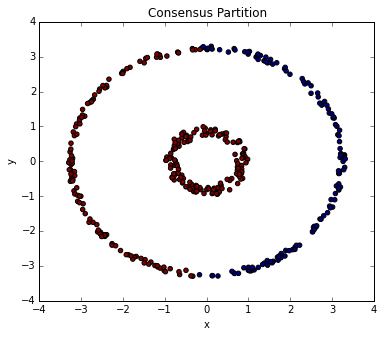

In [5]:
##################################################
# Consensus Partition                            #
##################################################
## Plot consensus partition
fig = plt.figure(fignum, figsize=(6, 5))
plt.clf() # clear the current figure
fig.add_axes(rect= [0,0,0.95,1])
plt.cla() # clear the current axis

mixture_model = c.mixture_model(K=2)

#N = 400
#nEnsCluster = 2
#list_of_baseSolutions = parg
#ensembleObj = mixture_model.mixtureModel(list_of_baseSolutions, N, nEnsCluster, iterations=10)
#piFinishing, consLabels = ensembleObj.emProcess()

#parg.append(labels)
labels = mixture_model.labels
plt.scatter(X[:,0], X[:,1], c=labels.astype(np.float))
plt.title('Consensus Partition')
plt.ylabel('y')
plt.xlabel('x')




In [6]:
mixture_model.labels

array([2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2,

In [4]:
## Fitness metric. Which metric to use??
title = ['K-means k=3','K-means k=4','K-means k=5','Consensus','Ground Truth']
metric = []
for arg in parg:
    metric.append(fitnessmetric.silhouette(X, np.asarray(arg)))

#metric.append(fitnessmetric.silhouette(X, np.asarray(consLabels)))
#metric.append(fitnessmetric.silhouette(X, np.asarray(y)))

print('                                                                                 ')
print('#################################################################################')
print('# OpenEnsemble Project:Testing the mixture model for the Iris dataset.           ')
print('# -----------------------------------------------------------------------------  ')
print('# Objects:{0}   Base Clustering Solutions:{2}   Clusters Consensus Partition:{1} ').format(N,nEnsCluster,len(list_of_baseSolutions))
#print('# Unique Clusters C. Partition:{0}                                               ').format(nUniqueClusters)
print('#                                                                                ')
print('# Fitness Metric                                                                 ')

for value in range(len(metric)):
    print('# {0}: {1:.3f}').format(title[value],metric[value])


print('#################################################################################')
print('                                                                                 ')

plt.show()

                                                                                 
#################################################################################
# OpenEnsemble Project:Testing the mixture model for the Iris dataset.           
# -----------------------------------------------------------------------------  
# Objects:400   Base Clustering Solutions:5   Clusters Consensus Partition:2 
#                                                                                
# Fitness Metric                                                                 
# K-means k=3: 0.310
# K-means k=4: 0.349
# K-means k=5: 0.291
# Consensus: 0.104
# Ground Truth: 0.104
#################################################################################
                                                                                 
